In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, "../../code-previous")

In [4]:
import pandas as pd
import numpy as np
import operator

import peakutils

import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import operator


import pickle
from sklearn.feature_extraction.text import CountVectorizer

import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

In [5]:
filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/word-journey-data.pql"
data_grouped_by_year_label = pd.read_pickle(filename)

In [6]:
input_ = data_grouped_by_year_label[data_grouped_by_year_label.Label == "Astronomy & Astrophysics"]
data_grouped_by_year_label = None

In [7]:
input_.head()

,index,Label,PubYear,title_without_stopwords,cleaned_titles,title_words_,title_words
1212,1212,Astronomy & Astrophysics,1900,"[crossley reflector lick obsertvatory, crossle...","[calculation elliptic elements system cygni , ...",calculation elliptic elements system cygni ph...,calculation elliptic elements system cygni phy...
1213,1213,Astronomy & Astrophysics,1901,"[accuracy photographic measures second note ,...","[form interferometer , sixty four variable sta...",form interferometer sixty four variable stars...,form interferometer sixty four variable stars ...
1214,1214,Astronomy & Astrophysics,1902,"[miscellaneous results , miscellaneous results...",[researches spectra metals spectrum molybdenu...,researches spectra metals spectrum molybdenum...,researches spectra metals spectrum molybdenum ...
1215,1215,Astronomy & Astrophysics,1903,"[cape double star results 1903 , cape double ...",[spectrographic observations standard velocity...,spectrographic observations standard velocity ...,spectrographic observations standard velocity ...
1216,1216,Astronomy & Astrophysics,1904,[magnetic disturbances recorded royal observat...,"[ninth satellite saturn , revised elements cyg...",ninth satellite saturn revised elements cygni...,ninth satellite saturn revised elements cygni ...


In [8]:
vectorizer = CountVectorizer()
vectorized_words = vectorizer.fit_transform(input_.title_words)

In [9]:
count_vocab = {value:key for key,value in vectorizer.vocabulary_.items()}
count_rev_dict = {value:key for key,value in vectorizer.vocabulary_.items()}
words = [count_rev_dict[i] for i in range(len(vectorizer.vocabulary_.keys()))]

In [10]:
vectorized_wordarray = vectorized_words.toarray()
document_frequency = (vectorized_wordarray != 0).sum(0).tolist()
document_frequency_log =  [np.log(x) for x in document_frequency]
#2. Term Frequency - Number of times in which a word appears in a document
term_frequency = vectorized_words.sum(axis=0).reshape(-1,).tolist()[0]
term_frequency_log = [np.log(x) for x in term_frequency]

In [11]:
vectorized_wordarray.shape

(117, 47379)

In [12]:
input_["number_of_pubs"] = input_["title_without_stopwords"].progress_apply(lambda x: len(x))

Progress: 100%|██████████| 117/117 [00:00<00:00, 55607.20it/s]


In [13]:
input_["word_count"] = input_["title_words"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 117/117 [00:00<00:00, 368.64it/s]


In [14]:
count_matrix = vectorized_words.toarray()

In [15]:
count_matrix[:4,100:120]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
      dtype=int64)

__Distribution of word counts in a year__

In [16]:
uniques = []
counts = []

for i in range(count_matrix.shape[0]):
    unique_, counts_tmp = np.unique(count_matrix[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    uniques.append(unique_)
    counts.append(counts_)

__Frequency Variations__

Words which have a frequency of 20 in year Y<sub>t</sub>. How much do they normally vary in years Y<sub>t+1</sub>, t<sub>t+2</sub> etc.

In [17]:
word_freq_variations = []
avg_variations_for_freq = []

for index in range(vectorized_wordarray.shape[0] - 1):
    tmp_ = vectorized_wordarray[index:index+2]
    
    unique_counts = np.unique(tmp_[0])    
    yearly_avg_variations_for_freq = []
    word_freq_variations = []
    
    word_freq_variations.append(tmp_[1] - tmp_[0])
    
    for uniq in unique_counts:
        indices, = np.where(tmp_[0] == uniq)
        transition_values = tmp_[1][indices]
        
        variations = transition_values - uniq
        mean_variation = np.mean(variations)
        
        yearly_avg_variations_for_freq.append(mean_variation)
    
    avg_variations_for_freq.append(yearly_avg_variations_for_freq)
    
        

In [18]:
# what are the frequencies of words in 1900
print("Average change in freq of a word appearing `index` times in 1900 ", avg_variations_for_freq[0])

Average change in freq of a word appearing `index` times in 1900  [0.005888251232052568, -0.6398809523809523, -1.05, -1.1578947368421053, -1.7391304347826086, -0.5, -1.2, -5.666666666666667, -5.0, -4.5, 4.5, -0.3333333333333333, -5.0, -5.0, 6.0, -11.0, -6.0, -10.0, -9.0]


Text(0,0.5,'Frequency')

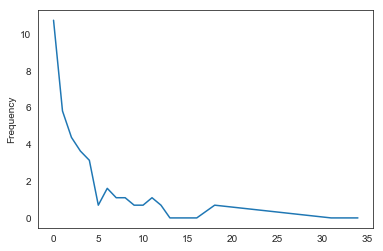

In [19]:
us, cs = np.unique(vectorized_words[0].toarray(), return_counts=True)
cs_ = list(map(np.log, cs))

f = plt.figure()

ax = f.add_subplot(111)
ax.plot(us, cs_)
ax.set_ylabel("Frequency")

In [20]:
# check if the word with frequency is changing at more than an average frequency

words_with_high_rate_of_change = []

word_indices = []

for year_index in tqdm(range(1, vectorized_wordarray.shape[0])):
    
    prev_year = vectorized_wordarray[year_index -1]
    current_year = vectorized_wordarray[year_index]
    
    avg_change_rate_for_year = avg_variations_for_freq[year_index - 1]
    
    word_indices_above_average_for_year = []
    
    #for freq in range(len(avg_variations_for_freq[year_index])):
    for freq in range(len(avg_change_rate_for_year)):
        
        try:
            avg_freq_for_words_with_similar_freq_in_current_year = avg_change_rate_for_year[freq]
        
            # indices in tmp_ where avg_change_rate_for_year
            indices1 = np.where(prev_year == freq)[0]
            indices2 = np.where(current_year > avg_freq_for_words_with_similar_freq_in_current_year)[0]
            
            above_average_freq_indices = [index for index in indices1 if index in indices2]
        
        
            word_indices_above_average_for_year.append(above_average_freq_indices)
            
        except:
            
            import ipdb
            ipdb.set_trace()
        
    word_indices.append(word_indices_above_average_for_year) 

100%|██████████| 116/116 [00:37<00:00,  1.59it/s]


__Flatten inside lists__

In [21]:
def flatten_inner(l):
    return [item for sublist in l for item in sublist]

flattened_word_indices = [flatten_inner(l1) for l1 in word_indices]

__The words in year 1901 which have a growth rate that is bigger than the mean growth rate of words with that frequency__ 

In [22]:
word_indices[0][18], words[39942], words[40003]

([39942, 40003], 'star', 'stars')

In [23]:
word_indices[0][16], words[11924]

([11924], 'eclipse')

In [24]:
# Top-Frequency words of 1901
from collections import Counter

words_from_1900 = input_.iloc[1].title_words.split()
d0 = Counter(words_from_1900)
s0 = [(k, d0[k]) for k in sorted(d0, key=d0.get, reverse=True)]



words_from_1901 = input_.iloc[1].title_words.split()
d1 = Counter(words_from_1901)
s1 = [(k, d1[k]) for k in sorted(d1, key=d1.get, reverse=True)]
#s[:20]

d1["stars"]

15

In [25]:
# number of words in a location

len(set(input_.iloc[0].title_words.split()))

507

In [77]:
idxs = [idx for idx in flattened_word_indices[65] if idx in flattened_word_indices[66]]

In [83]:
from functools import reduce

indices60s = flattened_word_indices[60:75]

res = list(reduce(lambda i, j: i & j, (set(x) for x in indices60s))) 
print ("The common elements from N lists : " + str(res)) 

len(res)

The common elements from N lists : [36864, 18433, 24578, 6146, 8204, 20492, 20493, 10262, 22554, 4123, 8221, 4125, 16415, 43040, 40997, 41004, 12334, 41007, 6193, 12339, 10292, 6196, 10295, 12345, 10298, 34875, 20543, 38977, 20565, 6229, 20567, 20572, 94, 36959, 14430, 45155, 28771, 30820, 32870, 8300, 34924, 10354, 2163, 12403, 117, 45173, 45175, 30840, 28793, 45177, 28798, 45184, 47233, 45188, 133, 150, 151, 28825, 28829, 26786, 39074, 20647, 12457, 12458, 174, 32944, 24753, 8372, 28852, 28853, 24760, 20664, 24761, 24765, 14526, 47297, 35011, 35017, 10442, 32971, 24779, 6349, 8400, 6355, 8408, 24794, 43226, 225, 41190, 2281, 22762, 24815, 242, 35062, 45306, 45307, 6398, 8448, 35079, 6408, 33040, 12562, 45334, 28954, 2332, 39197, 43296, 28961, 31010, 31013, 16679, 33065, 12593, 28979, 31028, 33080, 22843, 22845, 43327, 39232, 35144, 10571, 33101, 6477, 41296, 10576, 14676, 29013, 33111, 14681, 33117, 45406, 43359, 358, 43369, 366, 8562, 372, 10613, 18807, 4477, 33150, 18814, 43394, 33

618

In [22]:
words[6140]

'centaurus'

In [23]:
input_["count_of_sat"] = input_["title_words"].progress_apply(lambda x: x.count("centaurus"))
input_.head()

Progress: 100%|██████████| 117/117 [00:00<00:00, 2815.79it/s]


,index,Label,PubYear,title_without_stopwords,cleaned_titles,title_words_,title_words,number_of_pubs,word_count,count_of_sat
1212,1212,Astronomy & Astrophysics,1900,"[crossley reflector lick obsertvatory, crossle...","[calculation elliptic elements system cygni , ...",calculation elliptic elements system cygni ph...,calculation elliptic elements system cygni phy...,356,1040,0
1213,1213,Astronomy & Astrophysics,1901,"[accuracy photographic measures second note ,...","[form interferometer , sixty four variable sta...",form interferometer sixty four variable stars...,form interferometer sixty four variable stars ...,296,843,0
1214,1214,Astronomy & Astrophysics,1902,"[miscellaneous results , miscellaneous results...",[researches spectra metals spectrum molybdenu...,researches spectra metals spectrum molybdenum...,researches spectra metals spectrum molybdenum ...,304,950,0
1215,1215,Astronomy & Astrophysics,1903,"[cape double star results 1903 , cape double ...",[spectrographic observations standard velocity...,spectrographic observations standard velocity ...,spectrographic observations standard velocity ...,330,990,0
1216,1216,Astronomy & Astrophysics,1904,[magnetic disturbances recorded royal observat...,"[ninth satellite saturn , revised elements cyg...",ninth satellite saturn revised elements cygni...,ninth satellite saturn revised elements cygni ...,348,985,0


In [24]:
input_.iloc[60:70]

,index,Label,PubYear,title_without_stopwords,cleaned_titles,title_words_,title_words,number_of_pubs,word_count,count_of_sat
1272,1272,Astronomy & Astrophysics,1960,[method constructing revised general catalogue...,"[image tube experiment lick observatory, plan ...",image tube experiment lick observatory plan us...,image tube experiment lick observatory plan us...,978,2637,2
1273,1273,Astronomy & Astrophysics,1961,"[problems meridian astronomy, problems meridia...",[study interaction between carbon dissociated ...,study interaction between carbon dissociated g...,study interaction between carbon dissociated g...,1376,4051,1
1274,1274,Astronomy & Astrophysics,1962,[structure moons surface study first photograp...,"[astrometry with large reflectors, micrometer ...",astrometry with large reflectors micrometer me...,astrometry with large reflectors micrometer me...,1152,3228,4
1275,1275,Astronomy & Astrophysics,1963,"[adiabatic model atmospheres jupiter, adiabati...",[dynamic spectra jupiters decametric emission ...,dynamic spectra jupiters decametric emission ...,dynamic spectra jupiters decametric emission p...,1592,4302,2
1276,1276,Astronomy & Astrophysics,1964,[more precise determination astronomical unit ...,[linear polarization measurements radio source...,linear polarization measurements radio sources...,linear polarization measurements radio sources...,1880,5323,0
1277,1277,Astronomy & Astrophysics,1965,[micropulsation mode propagation magnetosphere...,"[evolution solar magnetic field, spiralstruktu...",evolution solar magnetic field spiralstruktur ...,evolution solar magnetic field spiralstruktur ...,2568,7195,1
1278,1278,Astronomy & Astrophysics,1966,"[note red shift galaxies, note red shift galax...",[loop prominences coronal condensations abunda...,loop prominences coronal condensations abundan...,loop prominences coronal condensations abundan...,4044,11298,0
1279,1279,Astronomy & Astrophysics,1967,[laboratory measurements negative reactions at...,"[saturns rings, evaluation kinetic rate data r...",saturns rings evaluation kinetic rate data rea...,saturns rings evaluation kinetic rate data rea...,5500,15684,2
1280,1280,Astronomy & Astrophysics,1968,"[albedo photometry surveyor foootprints, albed...","[nuclei seyfert galaxies observations, note po...",nuclei seyfert galaxies observations note posi...,nuclei seyfert galaxies observations note posi...,5930,17227,5
1281,1281,Astronomy & Astrophysics,1969,[cyclotron resonant instability waves propagat...,"[overstability thin stellar systems, progress ...",overstability thin stellar systems progress ra...,overstability thin stellar systems progress ra...,7176,21230,5
